In [107]:
from sympy import *
from sympy.physics.hep.gamma_matrices import GammaMatrix as G, LorentzIndex, gamma_trace
from sympy.tensor.tensor import tensor_indices
from sympy.physics.hep.gamma_matrices import kahane_simplify
i,j = tensor_indices('i,j', LorentzIndex)
init_printing(use_unicode=True)

In [108]:
eta = Matrix([[-1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])
eta

⎡-1  0  0  0⎤
⎢           ⎥
⎢0   1  0  0⎥
⎢           ⎥
⎢0   0  1  0⎥
⎢           ⎥
⎣0   0  0  1⎦

In [156]:
f, r, theta, phi, u_0, t = symbols("f r \\theta \phi u_0 t")
f,r,theta, phi

In [110]:
e =  Matrix([[sqrt(f),0,0,0],[0,1/sqrt(f),0,0],[0,0,r,0],[0,0,0,r * sin(theta)]])
e_inv = Matrix([[1/sqrt(f),0,0,0],[0,sqrt(f),0,0],[0,0,1/r,0],[0,0,0,1/(r * sin(theta))]])
e

⎡√f  0   0        0      ⎤
⎢                        ⎥
⎢    1                   ⎥
⎢0   ──  0        0      ⎥
⎢    √f                  ⎥
⎢                        ⎥
⎢0   0   r        0      ⎥
⎢                        ⎥
⎣0   0   0  r⋅sin(\theta)⎦

In [111]:
g = e.T@eta@e
g 

⎡-f  0  0          0       ⎤
⎢                          ⎥
⎢    1                     ⎥
⎢0   ─  0          0       ⎥
⎢    f                     ⎥
⎢                          ⎥
⎢        2                 ⎥
⎢0   0  r          0       ⎥
⎢                          ⎥
⎢            2    2        ⎥
⎣0   0  0   r ⋅sin (\theta)⎦

In [112]:
e_inv.T @ g @ e_inv

⎡-1  0  0  0⎤
⎢           ⎥
⎢0   1  0  0⎥
⎢           ⎥
⎢0   0  1  0⎥
⎢           ⎥
⎣0   0  0  1⎦

In [113]:
from sympy.physics.matrices import mgamma

In [317]:
def commutator(i,j):
    return mgamma(i)@mgamma(j) - mgamma(j)@mgamma(i)

def sigma(i,j):
    #psi = Matrix([[cos(theta/2),exp(I*phi)*sin(theta/2),0,0]])
    psi = Matrix([[1,0,0,0]])
    #psi = Matrix([[0,1,0,0]])
    return psi@mgamma(0)@commutator(i,j)@psi.T


In [318]:
s = zeros(4)


for i in range(4):
    for j in range(4):
        s[i,j] = I*sigma(i,j)/2

s

⎡0  0   0  0⎤
⎢           ⎥
⎢0  0   1  0⎥
⎢           ⎥
⎢0  -1  0  0⎥
⎢           ⎥
⎣0  0   0  0⎦

In [319]:
sigma = simplify(e_inv.T@s@e_inv)
sigma

⎡0           0                 0         0⎤
⎢                                         ⎥
⎢                            __________   ⎥
⎢                           ╱ -2⋅M + r    ⎥
⎢                          ╱  ────────    ⎥
⎢                        ╲╱      r        ⎥
⎢0           0           ──────────────  0⎥
⎢                              r          ⎥
⎢                                         ⎥
⎢        _____________                    ⎥
⎢       ╱ -(2⋅M - r)                      ⎥
⎢   -  ╱  ───────────                     ⎥
⎢    ╲╱        r                          ⎥
⎢0  ───────────────────        0         0⎥
⎢            r                            ⎥
⎢                                         ⎥
⎣0           0                 0         0⎦

In [305]:
import sympy
from einsteinpy.symbolic import Schwarzschild, ChristoffelSymbols, RiemannCurvatureTensor, Tensor, BaseRelativityTensor, GenericVector
from einsteinpy.symbolic.tensor import tensor_product

m = Schwarzschild()
ch = ChristoffelSymbols.from_metric(m)
ch.tensor()

⎡                                      ⎡    ⎛   2       2⎞                    
⎢                                      ⎢    ⎜  c    rₛ⋅c ⎟                    
⎢                                      ⎢-rₛ⋅⎜- ── + ─────⎟                    
⎢                                      ⎢    ⎝  2     2⋅r ⎠                    
⎢                                      ⎢───────────────────          0        
⎢                                      ⎢          2                           
⎢                                      ⎢         r                            
⎢                                      ⎢                                      
⎢                                      ⎢                        ⎛   2       2⎞
⎢⎡                     rₛ           ⎤  ⎢                        ⎜  c    rₛ⋅c ⎟
⎢⎢      0        ─────────────  0  0⎥  ⎢                     rₛ⋅⎜- ── + ─────⎟
⎢⎢                  2 ⎛    rₛ⎞      ⎥  ⎢                        ⎝  2     2⋅r ⎠
⎢⎢               2⋅r ⋅⎜1 - ──⎟      ⎥  ⎢         0  

In [306]:
rieman = RiemannCurvatureTensor.from_metric(m)

In [307]:
u_t , u_r , u_theta, u_phi,_c,r_s,M ,R= symbols("u_t u_r u_\\theta u_\phi c r_s M R")

In [308]:
u = GenericVector([u_t, u_r, 0, 0],syms=[t,r,theta,phi], config='u', name="velocity", parent_metric=m)
u.tensor()

[uₜ  uᵣ  0  0]

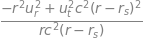

In [297]:
uu = tensor_product(u,u.change_config('l'), 0,0).tensor()
uu

In [301]:
print_latex(solve((-r**2 * u_r**2 + u_t**2 * (r -r_s)**2)/(r*(r - r_s)) + 1, u_t)[1].subs(r_s, 2*M))

\frac{\sqrt{r \left(2 M + r u_{r}^{2} - r\right)}}{- 2 M + r}


In [309]:
sig = BaseRelativityTensor(sigma,syms=[t,r,theta,phi], config="uu", name="sigma", parent_metric=m)
sig.tensor()

⎡0        0                  0           0⎤
⎢                                         ⎥
⎢                        _____________    ⎥
⎢                       ╱ -(2⋅M - r)      ⎥
⎢                   -  ╱  ───────────     ⎥
⎢                    ╲╱        r          ⎥
⎢0        0         ───────────────────  0⎥
⎢                            r            ⎥
⎢                                         ⎥
⎢       __________                        ⎥
⎢      ╱ -2⋅M + r                         ⎥
⎢     ╱  ────────                         ⎥
⎢   ╲╱      r                             ⎥
⎢0  ──────────────           0           0⎥
⎢         r                               ⎥
⎢                                         ⎥
⎣0        0                  0           0⎦

In [123]:

contraction = tensorcontraction(tensor_product(tensor_product(rieman.change_config("llll"),u, 1,0),sig,1,0,).tensor(),(1,2))
#contraction.tensor()

In [128]:
a = GenericVector(contraction.subs(f,1-r_s),syms=[t,r,theta,phi], config='l', name="acceleration", parent_metric=m)
print_latex(a.tensor().subs(r_s, 2*M))

\left[\begin{matrix}0 & 0 & - \frac{2 M u_{r} \sqrt{1 - 2 M}}{r c^{2} \left(- 2 M + r\right)} & 0\end{matrix}\right]


In [134]:
a.tensor().subs(u_r, sqrt( (M*(1/r - 1/R)) + ((u_0)**2)/2)).subs(r_s, 2*M)

⎡                            _________________    ⎤
⎢                           ╱               2     ⎥
⎢             _________    ╱    ⎛1   1⎞   u₀      ⎥
⎢      -2⋅M⋅╲╱ 1 - 2⋅M ⋅  ╱   M⋅⎜─ - ─⎟ + ───     ⎥
⎢                       ╲╱      ⎝r   R⎠    2      ⎥
⎢0  0  ────────────────────────────────────────  0⎥
⎢                     2                           ⎥
⎣                  r⋅c ⋅(-2⋅M + r)                ⎦

In [125]:
du_dtau = tensor_product(tensor_product(ch.change_config('ull'),u.change_config('u'), 1,0), u.change_config('u'),1,0)

In [126]:
du_dtau.tensor()

⎡               ⎛   2   2     2  2         2⎞      ⎤
⎢ rₛ⋅uᵣ⋅uₜ   rₛ⋅⎝- r ⋅uᵣ  + uₜ ⋅c ⋅(r - rₛ) ⎠      ⎥
⎢──────────  ────────────────────────────────  0  0⎥
⎢r⋅(r - rₛ)              3                         ⎥
⎣                     2⋅r ⋅(r - rₛ)                ⎦

In [147]:
ch = ch.change_config("ull")

In [179]:
e_inv = e_inv.subs(f, 1-2*M/r)
e = e.subs(f, 1-2*M/r)

In [310]:
firstpart = tensorcontraction(tensorcontraction(tensorproduct(tensorproduct(ch.tensor(),e),e_inv),(0,5)),(0,3))

In [311]:
secondpart = tensorcontraction(tensorproduct(e, Array([e_inv.diff(t).tolist(),e_inv.diff(r).tolist(),e_inv.diff(theta).tolist(),e_inv.diff(phi).tolist()])),(1,3))

In [312]:
w = firstpart - secondpart
w = tensorcontraction(tensorproduct(w,eta),(2,3))
w

⎡                                                                             
⎢                                                                             
⎢                                                                             
⎢⎡                                                  ⎛   2       2⎞            
⎢⎢                                                  ⎜  c    rₛ⋅c ⎟ ⎛  2⋅M    ⎞
⎢⎢                                              -rₛ⋅⎜- ── + ─────⎟⋅⎜- ─── + 1⎟
⎢⎢                                                  ⎝  2     2⋅r ⎠ ⎝   r     ⎠
⎢⎢                     0                        ──────────────────────────────
⎢⎢                                                              2             
⎢⎢                                                             r              
⎢⎢                                                                            
⎢⎢        M                      rₛ                                           
⎢⎢- ────────────── - ─────────────────────────      

In [320]:
Gamma = -1/4 * tensorcontraction(tensorcontraction(tensorproduct(w, s),(1,0)),(1,0))

In [321]:
dv = Array([simplify(Gamma.subs(r_s, 2*M))])
print_latex(dv.transpose())

\left[\begin{matrix}0\\- 0.0625 \cos{\left(\theta - 2 \theta \right)} + 0.0625 \cos{\left(\theta + 2 \theta \right)}\\\frac{0.25 \left(- 2 M r^{3} - M c^{2} \left(2 M - r\right)^{3} - r^{5} \sqrt{\frac{- 2 M + r}{r}} \left(2 M - r\right)^{2} \left(\sin{\left(\theta \right)} \sin^{2}{\left(\theta \right)} + 1\right)\right)}{r^{4} \cdot \left(2 M - r\right)}\\0\end{matrix}\right]


In [322]:
dv

⎡⎡                                                              ⎛             
⎢⎢                                                              ⎜       3     
⎢⎢                                                         0.25⋅⎜- 2⋅M⋅r  - M⋅
⎢⎢                                                              ⎝             
⎢⎢0  -0.0625⋅cos(\theta - 2⋅θ) + 0.0625⋅cos(\theta + 2⋅θ)  ───────────────────
⎢⎢                                                                            
⎣⎣                                                                            

                       __________                                     ⎞   ⎤⎤
 2          3    5    ╱ -2⋅M + r           2 ⎛               2       ⎞⎟   ⎥⎥
c ⋅(2⋅M - r)  - r ⋅  ╱  ──────── ⋅(2⋅M - r) ⋅⎝sin(\theta)⋅sin (θ) + 1⎠⎟   ⎥⎥
                   ╲╱      r                                          ⎠   ⎥⎥
───────────────────────────────────────────────────────────────────────  0⎥⎥
                     4                                       

In [315]:
dv = GenericVector(dv,syms=[t,r,theta,phi], config='l', name="dv", parent_metric=m)

ValueError: invalid shape of array for tensor of order implied by config: 'l'

In [253]:
dv.change_config('u').tensor()

⎡                                                                  ⎛          
⎢                                                                2 ⎜       3  
⎢           2                                                   c ⋅⎜0.5⋅M⋅r  +
⎢   0.0625⋅c ⋅(r - rₛ)⋅(cos(\theta - 2⋅θ) - cos(\theta + 2⋅θ))     ⎝          
⎢0  ──────────────────────────────────────────────────────────  ──────────────
⎢                               r                                             
⎣                                                                             

                                    __________                                
         2          3         5    ╱ -2⋅M + r           2 ⎛               2   
 0.25⋅M⋅c ⋅(2⋅M - r)  + 0.25⋅r ⋅  ╱  ──────── ⋅(2⋅M - r) ⋅⎝sin(\theta)⋅sin (θ)
                                ╲╱      r                                     
──────────────────────────────────────────────────────────────────────────────
                              6                    